In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
alldata=pd.read_csv('includecrossdist_allparam_middlepair.txt',delimiter='\t',names=['t','c1c1','c2c2','c1c2','c2c1','acosa1','acosa2','acosi1','acosi2','x','y','z','d','sd','acroll','acpitch','acyaw','acringang'])
alldata.head(10)

,t,c1c1,c2c2,c1c2,c2c1,acosa1,acosa2,acosi1,acosi2,x,y,z,d,sd,acroll,acpitch,acyaw,acringang
0,0.030207,0.371835,0.478303,0.408115,0.417668,0.404047,0.382568,0.853239,0.540140,0.315816,0.265199,0.092088,0.422553,0.587763,0.929411,0.987546,0.410902,0.917848
1,0.016725,0.476841,0.613318,0.531906,0.592959,0.343564,0.366966,0.707874,0.124368,0.306837,0.353256,-0.303205,0.557559,0.658232,0.995737,0.950273,0.366427,0.946237
2,0.001747,0.625174,0.668335,0.663929,0.666180,0.178385,0.072504,0.284772,0.569730,-0.435687,0.030655,0.410835,0.599623,0.464587,0.360882,0.745381,0.069817,0.268912
3,0.012650,0.465637,0.577282,0.513328,0.491654,0.980221,0.122406,0.722023,0.634057,-0.341357,0.381082,0.033992,0.512741,0.600254,0.962652,0.945280,0.657784,0.909952
4,0.001109,0.578552,0.660545,0.652282,0.580356,0.762210,0.414371,0.502441,0.472155,-0.055687,0.052812,0.546471,0.551834,0.370502,0.869028,0.687277,0.270780,0.597293
5,0.017942,0.520825,0.566766,0.563011,0.572316,0.745761,0.207339,0.068650,0.501058,-0.146347,0.361314,-0.311960,0.499284,0.415531,0.800175,0.876501,0.512002,0.701401
6,0.002764,0.595826,0.716593,0.639616,0.661317,0.308642,0.683910,0.296077,0.344641,0.323734,0.147381,0.474369,0.592917,0.459615,0.678015,0.632370,0.851555,0.428767
7,0.002805,0.475057,0.609164,0.538684,0.483178,0.916673,0.790753,0.547673,0.167686,-0.176163,-0.491576,0.007632,0.522244,0.655175,0.954786,0.848189,0.990473,0.809814
8,0.004368,0.542276,0.660312,0.559183,0.601223,0.197583,0.317935,0.588526,0.628706,0.016692,0.057806,0.548575,0.551864,0.515407,0.848841,0.518124,0.329632,0.439799
9,0.000429,0.577266,0.667124,0.593877,0.588677,0.167507,0.217116,0.390888,0.081854,-0.299375,-0.333098,0.355883,0.572042,0.520830,0.996782,0.425185,0.995175,0.423923


In [9]:
alldata=alldata[alldata['t']<=0.17]
alldata=alldata[alldata['t']>0]

In [10]:
inputdat=np.array(alldata[["c1c1","c2c2","c1c2","c2c1","acosa1","acosa2","acosi1","acosi2","x","y","z","d","sd","acroll","acpitch","acyaw","acringang"]])
outputdat=np.array(alldata[["t"]]).ravel()

In [11]:
from sklearn.model_selection import train_test_split
outputdat=np.log10(outputdat)
X_train, X_test, Y_train, Y_test = train_test_split(inputdat,outputdat,train_size=0.8,random_state=42)

[0.56229004 0.13041705 0.0382433  0.04001682 0.01092856 0.01468891
 0.0158628  0.01205823 0.01384714 0.01238517 0.0149939  0.0231865
 0.027469   0.02021131 0.01353029 0.02624939 0.0236216 ]


<BarContainer object of 17 artists>

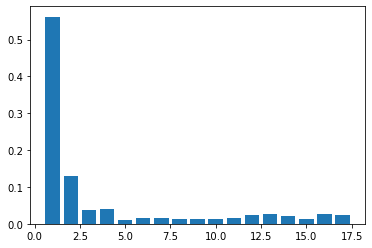

In [12]:
#feature selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

clf=RandomForestRegressor()
sel=clf.fit(X_train,Y_train)
print(sel.feature_importances_)
plt.bar(np.arange(1,18),sel.feature_importances_)

In [17]:
#To identify How many parameters are enough

In [18]:
#forward and backward selection process for one variable
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

sfs_forward = SequentialFeatureSelector(RandomForestRegressor(), n_features_to_select=1,
                                        direction='forward').fit(X_train, Y_train)

print(sfs_forward.get_support())

[ True False False False False False False False False False False False
 False False False False False]


In [19]:
#forward and backward selection process for two variable
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

sfs_forward = SequentialFeatureSelector(RandomForestRegressor(), n_features_to_select=2,
                                        direction='forward').fit(X_train, Y_train)

print(sfs_forward.get_support())

[ True  True False False False False False False False False False False
 False False False False False]


In [20]:
#forward and backward selection process for 3 variable
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

sfs_forward = SequentialFeatureSelector(RandomForestRegressor(), n_features_to_select=3,
                                        direction='forward').fit(X_train, Y_train)

print(sfs_forward.get_support())

[ True  True  True False False False False False False False False False
 False False False False False]


In [21]:
#forward and backward selection process for 4 variable
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

sfs_forward = SequentialFeatureSelector(RandomForestRegressor(), n_features_to_select=4,
                                        direction='forward').fit(X_train, Y_train)

print(sfs_forward.get_support())

[ True  True  True  True False False False False False False False False
 False False False False False]


In [22]:
#forward and backward selection process for 5 variable
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

sfs_forward = SequentialFeatureSelector(RandomForestRegressor(), n_features_to_select=5,
                                        direction='forward').fit(X_train, Y_train)

print(sfs_forward.get_support())

[ True  True  True  True False False False False False False False  True
 False False False False False]


In [23]:
#forward and backward selection process for 6 variable
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

sfs_forward = SequentialFeatureSelector(RandomForestRegressor(), n_features_to_select=6,
                                        direction='forward').fit(X_train, Y_train)

print(sfs_forward.get_support())

[ True  True  True  True False False False False False False False  True
 False False False False  True]


In [24]:
#forward and backward selection process for 7 variable
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

sfs_forward = SequentialFeatureSelector(RandomForestRegressor(), n_features_to_select=7,
                                        direction='forward').fit(X_train, Y_train)

print(sfs_forward.get_support())

[ True  True  True  True False False False False False False False  True
 False False False  True  True]


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

#Regression with only 1 parameter

X_train1=X_train[:,[0]]
X_test1=X_test[:,[0]]
clf1=RandomForestRegressor()
clf1=clf1.fit(X_train1,Y_train)
Y_pred1=clf1.predict(X_test1)
rmse1=np.sqrt(mean_squared_error(Y_test,Y_pred1))
rsq1=r2_score(Y_test,Y_pred1)
print(rmse1)
print(rsq1)

#Regression with only two parameter

X_train2=X_train[:,[0,1]]
X_test2=X_test[:,[0,1]]
clf2=RandomForestRegressor()
clf2=clf2.fit(X_train2,Y_train)
Y_pred2=clf2.predict(X_test2)
rmse2=np.sqrt(mean_squared_error(Y_test,Y_pred2))
rsq2=r2_score(Y_test,Y_pred2)
print(rmse2)
print(rsq2)

#Regression with only three parameter

X_train3=X_train[:,[0,1,2]]
X_test3=X_test[:,[0,1,2]]
clf3=RandomForestRegressor()
clf3=clf3.fit(X_train3,Y_train)
Y_pred3=clf3.predict(X_test3)
rmse3=np.sqrt(mean_squared_error(Y_test,Y_pred3))
rsq3=r2_score(Y_test,Y_pred3)
print(rmse3)
print(rsq3)

#Regression with only four parameter

X_train4=X_train[:,[0,1,2,3]]
X_test4=X_test[:,[0,1,2,3]]
clf4=RandomForestRegressor()
clf4=clf4.fit(X_train4,Y_train)
Y_pred4=clf4.predict(X_test4)
rmse4=np.sqrt(mean_squared_error(Y_test,Y_pred4))
rsq4=r2_score(Y_test,Y_pred4)
print(rmse4)
print(rsq4)

#Regression with only five parameter

X_train5=X_train[:,[0,1,2,3,11]]
X_test5=X_test[:,[0,1,2,3,11]]
clf5=RandomForestRegressor()
clf5=clf5.fit(X_train5,Y_train)
Y_pred5=clf5.predict(X_test5)
rmse5=np.sqrt(mean_squared_error(Y_test,Y_pred5))
rsq5=r2_score(Y_test,Y_pred5)
print(rmse5)
print(rsq5)

#Regression with only six parameter

X_train6=X_train[:,[0,1,2,3,11,16]]
X_test6=X_test[:,[0,1,2,3,11,16]]
clf6=RandomForestRegressor()
clf6=clf6.fit(X_train6,Y_train)
Y_pred6=clf6.predict(X_test6)
rmse6=np.sqrt(mean_squared_error(Y_test,Y_pred6))
rsq6=r2_score(Y_test,Y_pred6)
print(rmse6)
print(rsq6)

#Regression with only seven parameter

X_train7=X_train[:,[0,1,11,15,3,2,16]]
X_test7=X_test[:,[0,1,11,15,3,2,16]]
clf7=RandomForestRegressor()
clf7=clf7.fit(X_train7,Y_train)
Y_pred7=clf7.predict(X_test7)
rmse7=np.sqrt(mean_squared_error(Y_test,Y_pred7))
rsq7=r2_score(Y_test,Y_pred7)
print(rmse7)
print(rsq7)

0.5204315372717087
0.29201183402421593
0.3964842627450975
0.5890862308845095
0.36160894155956635
0.6581960260279445
0.33768684618483497
0.7019239557028647
0.3245889468783562
0.7245985390159473
0.31259779283554023
0.7445707661997661
0.3043878464924792
0.7578115642155067


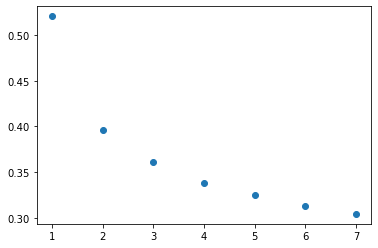

In [26]:
plt.scatter(np.arange(1,8),[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7])

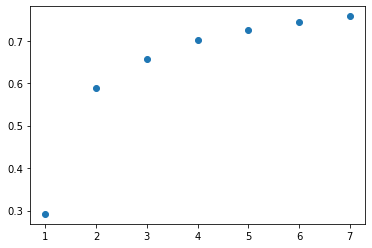

In [27]:
plt.scatter(np.arange(1,8),[rsq1,rsq2,rsq3,rsq4,rsq5,rsq6,rsq7])